# TP Machine Learning : linear regression


In [6]:
#necessary imports
from sklearn import datasets
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

## synthetic dataset

In this part, all the code is already written. We ask you the deeply understand what it does and to play with the parameters.

It is highly recommanded to read the documentation there: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression

In [7]:
from sklearn.datasets import make_regression

In [8]:
X, y, coeff = make_regression(n_features=2, bias = 2.0, coef=True, noise=4)

**Question 1:** With the help of the documentation, explain the different parameters. Try with and without noise, with dimension 1, 2 and more.

your answer here

Answer: 
n_features=  the number of features.
bais=    the bais term in the underlying linear model.
ceof=    if true the coefficient of the underlying linear model are returned.
noise=   the standerd deviation of the gaussian noise applied to the output.
x=       ndarray of shape (n_sample, n_features).The input samples.
y=       ndarray of shape (n_sample) or (n_sample, n_terget).The output values.
coeff=   ndarray of shape (n_features,) or (n_features, n_targets).
         The coefficient of the underlying linear model. It is returned only if coef is True.

### Let's have a look to the data!

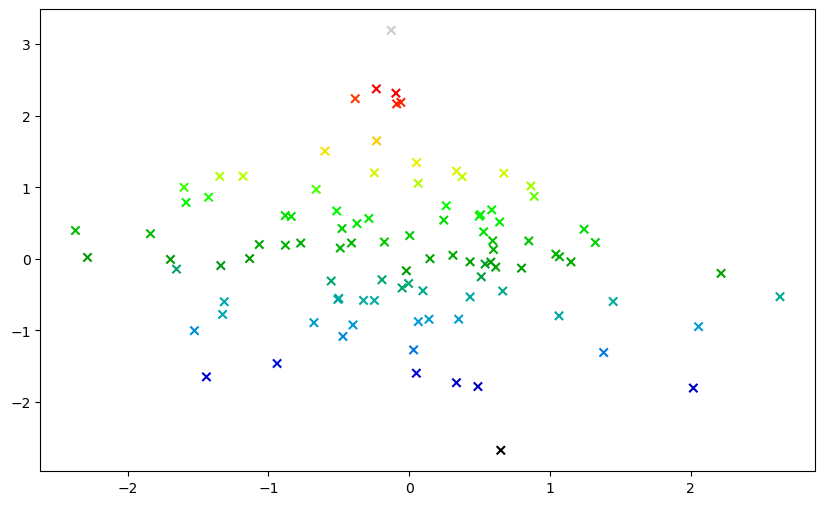

In [9]:
#this cells display 2d features with the colors representing the variations of y values
colors = [cm.nipy_spectral(float(i) / 255) for i in range(256)]

max = np.max(y)
min = np.min(y)
ycol = 255*(y-min)/(max-min)
ycol = ycol.astype('int')

col = [colors[yc] for yc in ycol]
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], color = col, marker="x")

In [10]:
#thist cell will plot 1d data with their y values
plt.figure(figsize=(10, 6))
plt.scatter(X=X, y=y, color = 'b', marker="x",format(marker))

SyntaxError: positional argument follows keyword argument (1735640519.py, line 3)

### Linear regression

In [11]:
# Splitting train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [12]:
# construction of linear regression and learning
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Evaluation of the linear regression

In [13]:
print("train score:", lr.score(X_train,y_train))
print("test score:", lr.score(X_test,y_test))

train score: 0.9969837499409296
test score: 0.9974459853676849


**Question 2:** What does this score represent? Is it good? (try to answer using the different options proposed for the dataset creation).


Answer: The range for the coefficient of correlation is -1 to +1, and therefore the range for the coefficient of determination is 0 to +1.The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). where a value of 1.0 indicates a perfect fit, and is thus a highly reliable model for future forecasts, while a value of 0.0 would indicate that the model fails to accurately model the data at all.  But a value of 0.20, for example, suggests that 20% of the dependent variable is predicted by the independent variable, while a value of 0.50 suggests that 50% of the dependent variable is predicted by the independent variable, and so forth.

But for this linear regression model the score result 0.99 which is almost 1. So we can say this model perfectly fit and highly reliable model for future.  
                    Yes this score is good.

In [14]:
# rmse computation
math.sqrt(mean_squared_error(y_train,lr.predict(X_train)))

4.597776048412907

We can also compare the true linear coefficients with the coefficients founded by the linear regression:

In [15]:
print(coeff)

[ 4.30005893 83.2843582 ]


In [16]:
print(lr.coef_, lr.intercept_)

[ 4.73919123 83.34705382] 2.128402957430139


**Question 3:** Let's plot the line with the data (fill the missing values in this cell)

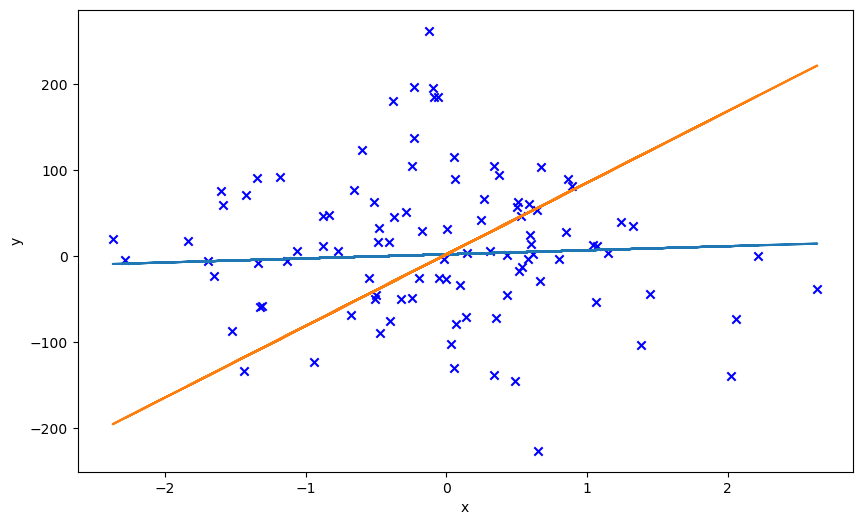

In [20]:
# case of dimension 1

y=y.reshape((100,1))
y.shape

x=X[:,0]
x=x.reshape((100,1))
x.shape


plt.figure(figsize=(10, 6))
plt.scatter(x,y, color = 'b', marker="x",label="data")
a = lr.coef_
b = lr.intercept_
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,a*x+b,label="regression")

## dataset: diabetes

In [91]:
# loading the dataset
diab = datasets.load_diabetes()
X = diab.data
y = diab.target

**Question 4:** how many data ?

In [92]:
print("There are ",len(y), "data.")

There are  442 data.


**Question 5**: type of data ? dimension of data ? type of labels ? 

In [93]:
print("The data are of dimension ",X.shape[1])
print("Type of data: ",type(X[0][0]))
print("Type of labels: ",type(y[0]))


The data are of dimension  10
Type of data:  <class 'numpy.float64'>
Type of labels:  <class 'numpy.float64'>


**Question 5bis**: What are the features ? 

In [94]:
#features names
diab["feature_names"]

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

**Question 6a:** Split train/test dataset

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, train_size = .70)

**Question 6b:** How many train data? How many test data?

In [96]:
print(f"No. of training Data: {X_train.shape[0]}")
print(f"No. of testing Data: {X_test.shape[0]}")

No. of training Data: 309
No. of testing Data: 133


**Question 7:** Linear regression. Create a default linear regression and learn this regression.

In [153]:
#create linear regression

reg = LinearRegression()
#learn this regression
learn = reg.fit(X_train, y_train)


# construction of linear regression and learning
#lr = LinearRegression()
#lr.fit(X_train, y_train)



**Question 8a:** Print the score. What do they represent? 

In [156]:
#Score
score= reg.score(X_train, y_train)
print('trian score',score)

score= reg.score(X_test, y_test)
print('test score',score)

trian score 0.9904223217126804
test score 0.9934820226918497


**Question 8b:** What are the mse and rmse values?

In [158]:
# Prediction of testset result of  the Prepared Model
y_pre = reg.predict(X_test)   # puts the test feature value to get the label value which are predicted by the model

#calculating mse and rmse value

mse=mean_squared_error(y_test, y_pre)
rmse=math.sqrt(mse)
print('mse and rmse valur for test data set')
print('mse value',mse)
print('rmse value',rmse)


# Prediction of testset result of  the Prepared Model
y_pre = reg.predict(X_train)   # puts the test feature value to get the label value which are predicted by the model

#calculating mse and rmse value
print('\nmse and rmse valur for train data set')
mse=mean_squared_error(y_train, y_pre)
rmse=math.sqrt(mse)
print('mse value',mse)
print('rmse value',rmse)


mse and rmse valur for test data set
mse value 13.935092176696607
rmse value 3.73297363728926

mse and rmse valur for train data set
mse value 16.998847992066402
rmse value 4.1229659217687455


**Question 9:** How could you test a non linear regression as for example a second degree polynom 

In [159]:
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(X)

#Splitting Data set
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, random_state=101, train_size = .70)

lr = LinearRegression()# creating linear regression model
lr.fit(X_train, y_train)

score= lr.score(X_train, y_train) # Score
print('trian score',score)

score= lr.score(X_test, y_test)
print('test score',score)


y_pre = lr.predict(X_train)   # puts the test feature value to get the label value which are predicted by the model

#calculating mse and rmse value

mse=mean_squared_error(y_train, y_pre)
rmse=np.sqrt(mse)
print('\nmse and rmse valur for train data set')
print('mse value',mse)
print('rmse value',rmse)

trian score 0.9987395473444081
test score 0.9978683726470473

mse and rmse valur for train data set
mse value 12.428421787496335
rmse value 3.5253966851258505
